In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout


In [ ]:
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.shape

(9172, 31)

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
#Removing Redundant attributes from dataset
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'], axis=1, inplace = True)

In [ ]:
diagnoses = {'A': 'hyperthyroid conditions',
             'B': 'hyperthyroid conditions',
             'C': 'hyperthyroid conditions',
             'D': 'hyperthyroid conditions',
             'E': 'hyperthyroid conditions',
             'F': 'hyperthyroid conditions',
             'G': 'hyperthyroid conditions',
             'H': 'hyperthyroid conditions',
             'I': 'binding protein',
             'J': 'binding protein',
             'K': 'general health',
             'L': 'replacement therapy',
             'M': 'replacement therapy',
             'N': 'replacement therapy',
             'O': 'antithyroid treatment',
             'P': 'antithyroid treatment',
             'Q': 'antithyroid treatment',
             'R': 'miscellaneous',
             'S': 'miscellaneous',
             'T': 'miscellaneous'}
data['target'] = data['target'].map(diagnoses)

In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hyperthyroid conditions    775
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
antithyroid treatment       33
Name: target, dtype: int64

In [ ]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [ ]:
x=data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [ ]:

x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [ ]:

x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [ ]:
#Encoding the categorical data
#Encoding the independent(output) variable
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#categorical data


ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['sex']])

<ipython-input-18-0a337bba829c>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
x.replace(np.nan, '0', inplace=True)

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.81,0,31.0,0.55,56.0,0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.18,0,28.0,0.87,32.0,0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,44.0,0.53,83.0,0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,84.0,1.26,67.0,0


In [ ]:
label_encoder = LabelEncoder()
y_dt= label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['target'])

In [ ]:
y

,target
0,4
1,3
2,4
3,1
4,5
...,...
2232,2
2233,2
2234,1
2235,1


In [ ]:
y.value_counts(normalize=True)

target
3         0.346446
2         0.194904
1         0.168082
5         0.150201
4         0.125615
0         0.014752
dtype: float64

<ipython-input-26-126b694a73df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

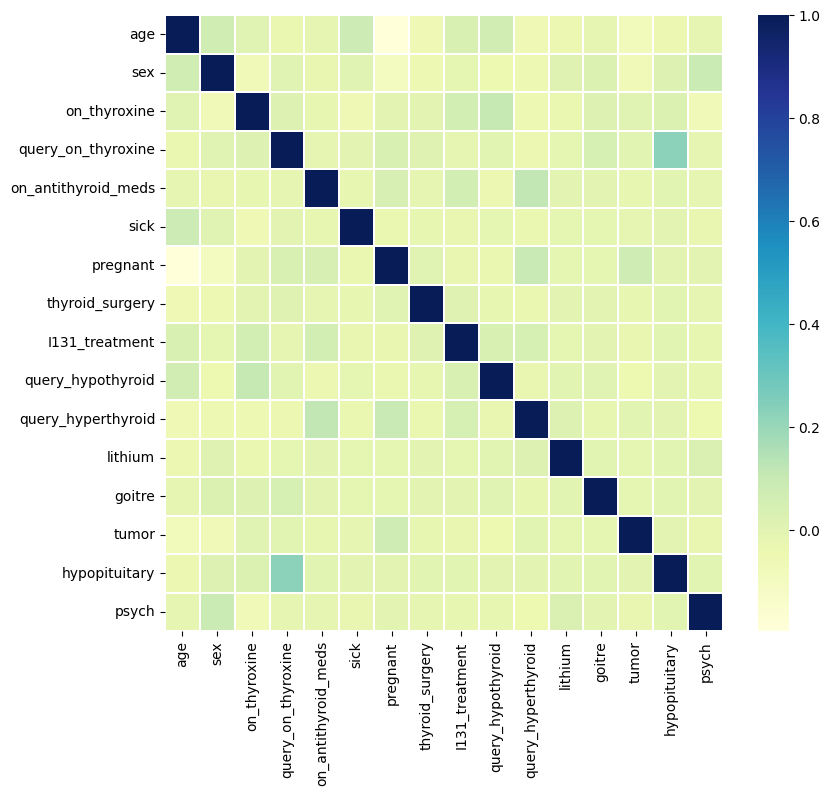

In [ ]:
import seaborn as sns
corrmat = x.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths =0.1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
y_train.value_counts()

target
3         615
2         351
1         302
5         265
4         230
0          26
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal= sc.transform(x_test_bal)

In [ ]:
x_bal

array([[-1.61400329, -0.42164543, -0.45764564, ..., -2.42387322,
        -1.44361817,  2.88735696],
       [-0.11257649, -0.42164543,  2.18509677, ..., -0.26728147,
         0.23652483, -0.20806903],
       [ 1.18175696,  2.37166093, -0.45764564, ...,  0.14844706,
        -0.06645178, -0.20806903],
       ...,
       [-0.06330731, -0.42164543,  2.18509677, ...,  0.50969605,
         0.80182915, -0.20806903],
       [-1.58523289, -0.42164543,  2.18509677, ..., -0.13241395,
         0.99134148, -0.20806903],
       [ 0.87355885, -0.42164543,  2.18509677, ..., -0.04951419,
         1.62286358, -0.20806903]])

In [ ]:
x_test_bal

array([[-1.51045661, -0.42164543, -0.45764564, ...,  1.00588716,
         0.30538315, -0.20806903],
       [-0.88917656, -0.42164543, -0.45764564, ...,  1.68144602,
        -0.19039675, -0.20806903],
       [-0.9409499 ,  2.37166093, -0.45764564, ..., -0.39719663,
        -0.87897995, -0.20806903],
       ...,
       [-0.51534427, -0.42164543,  2.18509677, ...,  0.1744301 ,
         1.14237592, -0.20806903],
       [ 0.94364377, -0.42164543,  2.18509677, ...,  0.07217845,
         1.23912546, -0.20806903],
       [ 0.67923158, -0.42164543,  2.18509677, ..., -0.11729553,
        -0.86593234, -0.20806903]])

In [ ]:
y_bal.value_counts()

target
0         615
1         615
2         615
3         615
4         615
5         615
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal)
y_pred = rfr. predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

<ipython-input-34-62a1f7776122>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestClassifier().fit(x_bal,y_bal)


((3690, 22), (3690, 1), (960, 22), (960, 1))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

0.9239583333333333

In [ ]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal, scoring='accuracy')

In [ ]:
rfr1 = RandomForestClassifier()
rfr1.fit(x_bal,y_bal)
y_pred=rfr1.predict(x_test_bal)

<ipython-input-38-0f47a2fbaab0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal,y_bal)


In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       160
           1       0.91      0.93      0.92       160
           2       0.94      0.98      0.96       160
           3       0.78      0.94      0.85       160
           4       0.96      0.96      0.96       160
           5       0.99      0.91      0.95       160

    accuracy                           0.92       960
   macro avg       0.93      0.92      0.92       960
weighted avg       0.93      0.92      0.92       960



In [ ]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))

In [ ]:
train_score

1.0

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72       160
           1       0.95      0.94      0.94       160
           2       0.93      0.99      0.96       160
           3       0.67      0.96      0.78       160
           4       0.93      0.93      0.93       160
           5       1.00      0.91      0.95       160

    accuracy                           0.88       960
   macro avg       0.90      0.88      0.88       960
weighted avg       0.90      0.88      0.88       960



In [ ]:
train_score = accuracy_score(y_bal, xgb.predict(x_bal))
train_score

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
sv.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       160
           1       0.88      0.81      0.84       160
           2       0.81      0.91      0.86       160
           3       0.81      0.62      0.70       160
           4       0.84      0.85      0.85       160
           5       0.92      0.94      0.93       160

    accuracy                           0.85       960
   macro avg       0.85      0.85      0.85       960
weighted avg       0.85      0.85      0.85       960



In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.8791327913279133

In [ ]:
params={
    'n_estimators':[100, 200,500],
    'criterion':['gini', 'entropy'],
    'max_depth':[x for x in range(1,20)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfr1, params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(x_bal,y_bal)

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 19, 'n_estimators': 200}

In [ ]:
rfr_gs=RandomForestClassifier(criterion= 'entropy', max_depth=16, n_estimators= 200)

In [ ]:
rfr_gs.fit(x_bal,y_bal)

<ipython-input-112-e295d669d733>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_gs.fit(x_bal,y_bal)


RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200)

In [ ]:
y_pred=rfr_gs.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       160
           1       0.92      0.94      0.93       160
           2       0.93      0.99      0.96       160
           3       0.77      0.94      0.85       160
           4       0.96      0.94      0.95       160
           5       0.99      0.91      0.94       160

    accuracy                           0.92       960
   macro avg       0.93      0.92      0.92       960
weighted avg       0.93      0.92      0.92       960



In [ ]:
train_score= accuracy_score(y_bal,rfr_gs.predict(x_bal))
train_score
                                                 

1.0

In [ ]:
params={
    'n_estimators':[100, 200, 500],
    'learning_rate':[0.01,0.05,0.1],
    'booster':['gbtree', 'gblinear'],
    'gamma':[0, 0.5, 1],
}

In [ ]:
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy',cv=3,n_jobs=-1)

In [ ]:
grid_xgb.fit(x_bal,y_bal)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_xgb.best_params_

{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500}

In [ ]:
xgb1=XGBClassifier(booster='gbtree', gamma= 0, learning_rate= 0.1, n_estimators= 500)

In [ ]:
xgb1.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred= xgb1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70       160
           1       0.94      0.94      0.94       160
           2       0.93      1.00      0.96       160
           3       0.65      0.96      0.78       160
           4       0.94      0.92      0.93       160
           5       1.00      0.91      0.95       160

    accuracy                           0.88       960
   macro avg       0.90      0.88      0.88       960
weighted avg       0.90      0.88      0.88       960



In [ ]:
train_score= accuracy_score(y_bal,xgb1.predict(x_bal))
train_score

1.0

In [ ]:
params = {
    'C' : [0.01, 0.1, 1, 10,100, 1000],
    'kernel':['rbf', 'linear'],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    }

In [ ]:
grid_svc = GridSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
sv1=SVC(C=1000,gamma=1, kernel= 'rbf')

In [ ]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77       160
           1       0.87      0.81      0.84       160
           2       0.93      0.84      0.89       160
           3       0.47      0.88      0.61       160
           4       0.94      0.77      0.85       160
           5       0.95      0.76      0.85       160

    accuracy                           0.78       960
   macro avg       0.85      0.78      0.80       960
weighted avg       0.85      0.78      0.80       960



In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

1.0

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform (xgb1.predict(features)))

ValueError: ignored

In [ ]:
type(features)

numpy.ndarray

In [ ]:
pickle.dump(label_encoder,open('label_encoder.pk1','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hyperthyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'antithyroid treatment'],
      dtype=object)

In [ ]:
y['target'].unique()

array([4, 3, 1, 5, 2, 0])